## <font color=FF4455>Regression for OSA</font>


# Data Preparation

### Dependencies

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

We'll first start by splitting the data into train and test sets

In [2]:
def split_data(xlsx_data):
    """
    Reads xlsx file, separates features from variables, and split it into train and test
    """
    df = pd.read_excel(xlsx_data)
    # Define feature matrix (X) and target variable (y)
    if 'Patient' in df.columns:
        df = df.drop('Patient', axis=1)
    X = df.drop('IAH', axis=1)  # Features
    y = df['IAH']  # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [3]:
def read_data(xlsx_data):
    """
    Reads xlsx file, separates features from variables
    """
    df = pd.read_excel(xlsx_data)
    # Define feature matrix (X) and target variable (y)
    if 'Patient' in df.columns:
        df = df.drop('Patient', axis=1)
    X = df.drop('IAH', axis=1)  # Features
    y = df['IAH']  # Target

    return X, y

In [4]:
X_train, X_test, y_train, y_test = split_data("../datasets/Clinical_data.xlsx")
X_train_norm, X_test_norm, y_train_norm, y_test_norm = split_data("../datasets/Clinical_data_norm.xlsx")
X_train_selec, X_test_selec, y_train_selec, y_test_selec = split_data("../datasets/Clinical_selected_features.xlsx")

In [5]:
print(f"Training set size: {len(X_train)}")
# print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Training set size: 519
Test set size: 130


# Models

We will try to fit a model for the 3 datasets we have: The original, the normalized, and the one with only selected features according to Pearson correlation.

### Useful functions

In [6]:
def fit_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Fits a regression model and returns predictions and train/test losses.
    """
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate MSE loss
    test_loss_mse = mean_squared_error(y_test, y_test_pred)

    # Calculate MAE loss
    test_loss_mae = mean_absolute_error(y_test, y_test_pred)

    return y_train_pred, y_test_pred, test_loss_mse, test_loss_mae

### Multiple Linear Regression

In [7]:
# Initialize the model
model = LinearRegression()

# Fit and evaluate the model on the original dataset
y_train_pred, y_test_pred, test_loss_mse, test_loss_mae = fit_and_evaluate_model(model, X_train, y_train, X_test, y_test)
print(f"Original dataset - Test MSE: {test_loss_mse}, Test MAE: {test_loss_mae}")

# Fit and evaluate the model on the normalized dataset
y_train_pred_norm, y_test_pred_norm, test_loss_mse_norm, test_loss_mae_norm = fit_and_evaluate_model(model, X_train_norm, y_train_norm, X_test_norm, y_test_norm)
print(f"Normalized dataset - Test MSE: {test_loss_mse_norm}, Test MAE: {test_loss_mae_norm}")

# Fit and evaluate the model on the selected features dataset
y_train_pred_selec, y_test_pred_selec, test_loss_mse_selec, test_loss_mae_selec = fit_and_evaluate_model(model, X_train_selec, y_train_selec, X_test_selec, y_test_selec)
print(f"Selected features dataset - Test MSE: {test_loss_mse_selec}, Test MAE: {test_loss_mae_selec}")

Original dataset - Test MSE: 303.38853474944176, Test MAE: 13.141179693335557
Normalized dataset - Test MSE: 303.3885347494418, Test MAE: 13.141179693335559
Selected features dataset - Test MSE: 306.43910031789835, Test MAE: 13.337509502574392


Let's store the losse inside a dictionary so that we can use them later

In [8]:
# Store the losses in a dictionary
MLRegression_losses = {
    "original": {
        "MSE": test_loss_mse,
        "MAE": test_loss_mae
    },
    "normalized": {
        "MSE": test_loss_mse_norm,
        "MAE": test_loss_mae_norm
    },
    "selected_features": {
        "MSE": test_loss_mse_selec,
        "MAE": test_loss_mae_selec
    }
}

### Random Forest regressor

In [9]:
# Initialize the model
model = RandomForestRegressor()

# Fit and evaluate the model on the original dataset
y_train_pred, y_test_pred, test_loss_mse, test_loss_mae = fit_and_evaluate_model(model, X_train, y_train, X_test, y_test)
print(f"Original dataset - Test MSE: {test_loss_mse}, Test MAE: {test_loss_mae}")

# Fit and evaluate the model on the normalized dataset
y_train_pred_norm, y_test_pred_norm, test_loss_mse_norm, test_loss_mae_norm = fit_and_evaluate_model(model, X_train_norm, y_train_norm, X_test_norm, y_test_norm)
print(f"Normalized dataset - Test MSE: {test_loss_mse_norm}, Test MAE: {test_loss_mae_norm}")

# Fit and evaluate the model on the selected features dataset
y_train_pred_selec, y_test_pred_selec, test_loss_mse_selec, test_loss_mae_selec = fit_and_evaluate_model(model, X_train_selec, y_train_selec, X_test_selec, y_test_selec)
print(f"Selected features dataset - Test MSE: {test_loss_mse_selec}, Test MAE: {test_loss_mae_selec}")

Original dataset - Test MSE: 307.3083755390769, Test MAE: 13.025524615384615
Normalized dataset - Test MSE: 302.7011751522308, Test MAE: 12.905296153846153
Selected features dataset - Test MSE: 286.1634937553376, Test MAE: 12.24237205128205


In [10]:
RandFor_losses = {
    "original": {
        "MSE": test_loss_mse,
        "MAE": test_loss_mae
    },
    "normalized": {
        "MSE": test_loss_mse_norm,
        "MAE": test_loss_mae_norm
    },
    "selected_features": {
        "MSE": test_loss_mse_selec,
        "MAE": test_loss_mae_selec
    }
}

### Decision Tree regressor

In [11]:
# Initialize the model
model = DecisionTreeRegressor()

# Fit and evaluate the model on the original dataset
y_train_pred, y_test_pred, test_loss_mse, test_loss_mae = fit_and_evaluate_model(model, X_train, y_train, X_test, y_test)
print(f"Original dataset - Test MSE: {test_loss_mse}, Test MAE: {test_loss_mae}")

# Fit and evaluate the model on the normalized dataset
y_train_pred_norm, y_test_pred_norm, test_loss_mse_norm, test_loss_mae_norm = fit_and_evaluate_model(model, X_train_norm, y_train_norm, X_test_norm, y_test_norm)
print(f"Normalized dataset - Test MSE: {test_loss_mse_norm}, Test MAE: {test_loss_mae_norm}")

# Fit and evaluate the model on the selected features dataset
y_train_pred_selec, y_test_pred_selec, test_loss_mse_selec, test_loss_mae_selec = fit_and_evaluate_model(model, X_train_selec, y_train_selec, X_test_selec, y_test_selec)
print(f"Selected features dataset - Test MSE: {test_loss_mse_selec}, Test MAE: {test_loss_mae_selec}")

Original dataset - Test MSE: 420.79276923076924, Test MAE: 15.227692307692307
Normalized dataset - Test MSE: 444.8028276923077, Test MAE: 15.609692307692306
Selected features dataset - Test MSE: 309.0530384615385, Test MAE: 12.773076923076923


In [12]:
DecisionTr_losses = {
    "original": {
        "MSE": test_loss_mse,
        "MAE": test_loss_mae
    },
    "normalized": {
        "MSE": test_loss_mse_norm,
        "MAE": test_loss_mae_norm
    },
    "selected_features": {
        "MSE": test_loss_mse_selec,
        "MAE": test_loss_mae_selec
    }
}

### Support Vector Regressor

In [13]:
# Initialize the model
model = SVR()

# Fit and evaluate the model on the original dataset
y_train_pred, y_test_pred, test_loss_mse, test_loss_mae = fit_and_evaluate_model(model, X_train, y_train, X_test, y_test)
print(f"Original dataset - Test MSE: {test_loss_mse}, Test MAE: {test_loss_mae}")

# Fit and evaluate the model on the normalized dataset
y_train_pred_norm, y_test_pred_norm, test_loss_mse_norm, test_loss_mae_norm = fit_and_evaluate_model(model, X_train_norm, y_train_norm, X_test_norm, y_test_norm)
print(f"Normalized dataset - Test MSE: {test_loss_mse_norm}, Test MAE: {test_loss_mae_norm}")

# Fit and evaluate the model on the selected features dataset
y_train_pred_selec, y_test_pred_selec, test_loss_mse_selec, test_loss_mae_selec = fit_and_evaluate_model(model, X_train_selec, y_train_selec, X_test_selec, y_test_selec)
print(f"Selected features dataset - Test MSE: {test_loss_mse_selec}, Test MAE: {test_loss_mae_selec}")

Original dataset - Test MSE: 331.58466709128606, Test MAE: 12.54351159961114
Normalized dataset - Test MSE: 319.56687929784727, Test MAE: 12.34425755860614
Selected features dataset - Test MSE: 325.3495037180799, Test MAE: 12.952069509565291


In [14]:
SVR_losses = {
    "original": {
        "MSE": test_loss_mse,
        "MAE": test_loss_mae
    },
    "normalized": {
        "MSE": test_loss_mse_norm,
        "MAE": test_loss_mae_norm
    },
    "selected_features": {
        "MSE": test_loss_mse_selec,
        "MAE": test_loss_mae_selec
    }
}

### k-Nearest Neighbors regressor

Let's start by trying to find the optimal K

In [15]:
# Define a range of k values to test
k_values = range(1, 21)

# Initialize lists to store the losses
mse_losses = []
mae_losses = []

# Loop over the range of k values
for k in k_values:
    # Initialize the model with the current k
    model = KNeighborsRegressor(n_neighbors=k)
    
    # Fit and evaluate the model on the original dataset
    _, _, test_loss_mse, test_loss_mae = fit_and_evaluate_model(model, X_train, y_train, X_test, y_test)
    
    # Store the losses
    mse_losses.append(test_loss_mse)
    mae_losses.append(test_loss_mae)


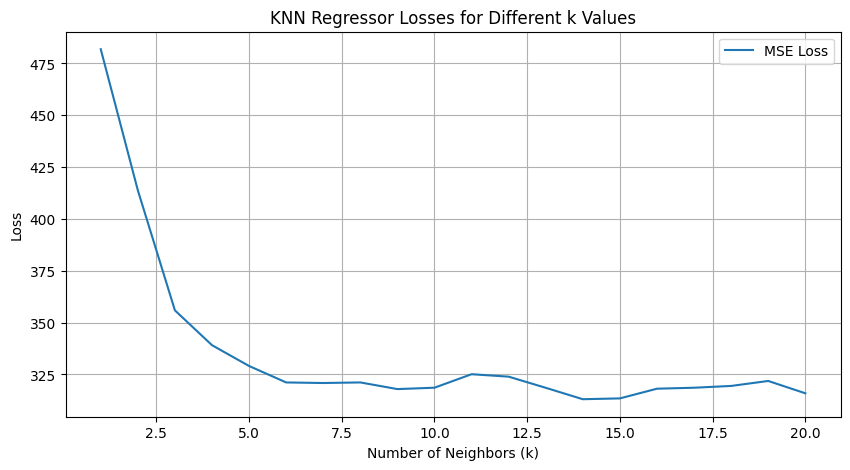

In [16]:
# Plot the losses
plt.figure(figsize=(10, 5))
plt.plot(k_values, mse_losses, label='MSE Loss')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Loss')
plt.title('KNN Regressor Losses for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

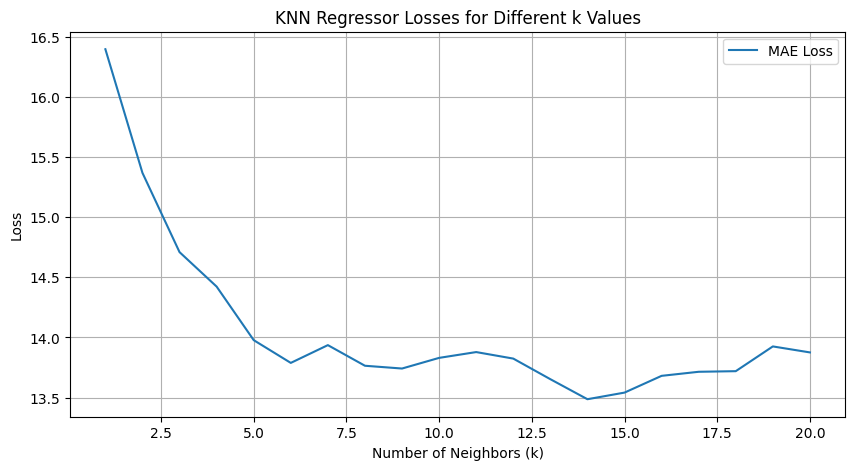

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, mae_losses, label='MAE Loss')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Loss')
plt.title('KNN Regressor Losses for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Find the index of the minimum MSE loss
best_k_index_mse = mse_losses.index(min(mse_losses))
best_k_index_mae = mae_losses.index(min(mae_losses))

# Get the corresponding k value
best_k_mse = k_values[best_k_index_mse]
best_k_mae = k_values[best_k_index_mae]

print(best_k_index_mse, best_k_index_mae)

13 13


The number of neighbor that achieves the minimum loss is 13, we'll go with k=13 for the other datasets

In [19]:
model = KNeighborsRegressor(n_neighbors=13)

# Initialize the model
model = DecisionTreeRegressor()

# Fit and evaluate the model on the original dataset
y_train_pred, y_test_pred, test_loss_mse, test_loss_mae = fit_and_evaluate_model(model, X_train, y_train, X_test, y_test)
print(f"Original dataset - Test MSE: {test_loss_mse}, Test MAE: {test_loss_mae}")

# Fit and evaluate the model on the normalized dataset
y_train_pred_norm, y_test_pred_norm, test_loss_mse_norm, test_loss_mae_norm = fit_and_evaluate_model(model, X_train_norm, y_train_norm, X_test_norm, y_test_norm)
print(f"Normalized dataset - Test MSE: {test_loss_mse_norm}, Test MAE: {test_loss_mae_norm}")

# Fit and evaluate the model on the selected features dataset
y_train_pred_selec, y_test_pred_selec, test_loss_mse_selec, test_loss_mae_selec = fit_and_evaluate_model(model, X_train_selec, y_train_selec, X_test_selec, y_test_selec)
print(f"Selected features dataset - Test MSE: {test_loss_mse_selec}, Test MAE: {test_loss_mae_selec}")


Original dataset - Test MSE: 440.27405846153846, Test MAE: 15.225076923076921
Normalized dataset - Test MSE: 443.02952, Test MAE: 15.465846153846153
Selected features dataset - Test MSE: 309.4088461538462, Test MAE: 13.006153846153847


In [20]:
Knn_losses = {
    "original": {
        "MSE": test_loss_mse,
        "MAE": test_loss_mae
    },
    "normalized": {
        "MSE": test_loss_mse_norm,
        "MAE": test_loss_mae_norm
    },
    "selected_features": {
        "MSE": test_loss_mse_selec,
        "MAE": test_loss_mae_selec
    }
}

# Regularization

### L1 Regularization

In [21]:
# Initialize the Lasso model
lasso_model = Lasso()

# Fit and evaluate the Lasso model on the original dataset
y_train_pred_lasso, y_test_pred_lasso, test_loss_mse_lasso, test_loss_mae_lasso = fit_and_evaluate_model(lasso_model, X_train, y_train, X_test, y_test)
print(f"Lasso - Original dataset - Test MSE: {test_loss_mse_lasso}, Test MAE: {test_loss_mae_lasso}")

# Fit and evaluate the Lasso model on the normalized dataset
y_train_pred_lasso_norm, y_test_pred_lasso_norm, test_loss_mse_lasso_norm, test_loss_mae_lasso_norm = fit_and_evaluate_model(lasso_model, X_train_norm, y_train_norm, X_test_norm, y_test_norm)
print(f"Lasso - Normalized dataset - Test MSE: {test_loss_mse_lasso_norm}, Test MAE: {test_loss_mae_lasso_norm}")

# Fit and evaluate the Lasso model on the selected features dataset
y_train_pred_lasso_selec, y_test_pred_lasso_selec, test_loss_mse_lasso_selec, test_loss_mae_lasso_selec = fit_and_evaluate_model(lasso_model, X_train_selec, y_train_selec, X_test_selec, y_test_selec)
print(f"Lasso - Selected features dataset - Test MSE: {test_loss_mse_lasso_selec}, Test MAE: {test_loss_mae_lasso_selec}")

Lasso - Original dataset - Test MSE: 303.826776759853, Test MAE: 13.244174908684275
Lasso - Normalized dataset - Test MSE: 339.1612012501555, Test MAE: 14.375800711162732
Lasso - Selected features dataset - Test MSE: 307.9389186449651, Test MAE: 13.424916671555707


In [22]:
L1_losses = {
    "original": {
        "MSE": test_loss_mse,
        "MAE": test_loss_mae
    },
    "normalized": {
        "MSE": test_loss_mse_norm,
        "MAE": test_loss_mae_norm
    },
    "selected_features": {
        "MSE": test_loss_mse_selec,
        "MAE": test_loss_mae_selec
    }
}

### L2 Regularization

In [23]:
# Initialize the Ridge model
ridge_model = Ridge()

# Fit and evaluate the Ridge model on the original dataset
y_train_pred_ridge, y_test_pred_ridge, test_loss_mse_ridge, test_loss_mae_ridge = fit_and_evaluate_model(ridge_model, X_train, y_train, X_test, y_test)
print(f"Ridge - Original dataset - Test MSE: {test_loss_mse_ridge}, Test MAE: {test_loss_mae_ridge}")

# Fit and evaluate the Ridge model on the normalized dataset
y_train_pred_ridge_norm, y_test_pred_ridge_norm, test_loss_mse_ridge_norm, test_loss_mae_ridge_norm = fit_and_evaluate_model(ridge_model, X_train_norm, y_train_norm, X_test_norm, y_test_norm)
print(f"Ridge - Normalized dataset - Test MSE: {test_loss_mse_ridge_norm}, Test MAE: {test_loss_mae_ridge_norm}")

# Fit and evaluate the Ridge model on the selected features dataset
y_train_pred_ridge_selec, y_test_pred_ridge_selec, test_loss_mse_ridge_selec, test_loss_mae_ridge_selec = fit_and_evaluate_model(ridge_model, X_train_selec, y_train_selec, X_test_selec, y_test_selec)
print(f"Ridge - Selected features dataset - Test MSE: {test_loss_mse_ridge_selec}, Test MAE: {test_loss_mae_ridge_selec}")

Ridge - Original dataset - Test MSE: 303.3920510726523, Test MAE: 13.141097919075772
Ridge - Normalized dataset - Test MSE: 302.9084299437855, Test MAE: 13.229904171599957
Ridge - Selected features dataset - Test MSE: 306.44028637136086, Test MAE: 13.33771011875295


In [24]:
L2_losses = {
    "original": {
        "MSE": test_loss_mse,
        "MAE": test_loss_mae
    },
    "normalized": {
        "MSE": test_loss_mse_norm,
        "MAE": test_loss_mae_norm
    },
    "selected_features": {
        "MSE": test_loss_mse_selec,
        "MAE": test_loss_mae_selec
    }
}

In [25]:
# Combine all the loss dictionaries into one big dictionary
all_losses = {
    "MLRegression": MLRegression_losses,
    "RandFor": RandFor_losses,
    "DecisionTr": DecisionTr_losses,
    "SVR": SVR_losses,
    "Knn": Knn_losses,
    "L1": L1_losses,
    "L2": L2_losses
}


In [26]:
def plot_losses(all_losses, loss_type):
    """
    Plots the MSE or MAE losses for all models across different datasets.
    
    Parameters:
    all_losses (dict): Dictionary containing losses for each model.
    loss_type (str): "MSE" or "MAE", to select which loss to plot.
    """
    # Initialize plot data
    models = list(all_losses.keys())  # List of model names
    datasets = ["original", "normalized", "selected_features"]  # Dataset types
    
    # Prepare the plot
    plt.figure(figsize=(10, 6))
    
    # Iterate over dataset types
    for i, dataset in enumerate(datasets):
        losses = []
        for model in models:
            losses.append(all_losses[model][dataset][loss_type])
        
        # Plot each dataset's losses for the selected loss_type (MSE or MAE)
        x_pos = np.arange(len(models))
        plt.bar(x_pos + (i * 0.25), losses, width=0.25, label=f'{dataset} {loss_type}')
    
    # Add labels and title
    plt.xticks(x_pos + 0.25, models, rotation=45)
    plt.ylabel(f'{loss_type} Loss')
    plt.title(f'{loss_type} Losses for Each Model and Dataset Type')
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


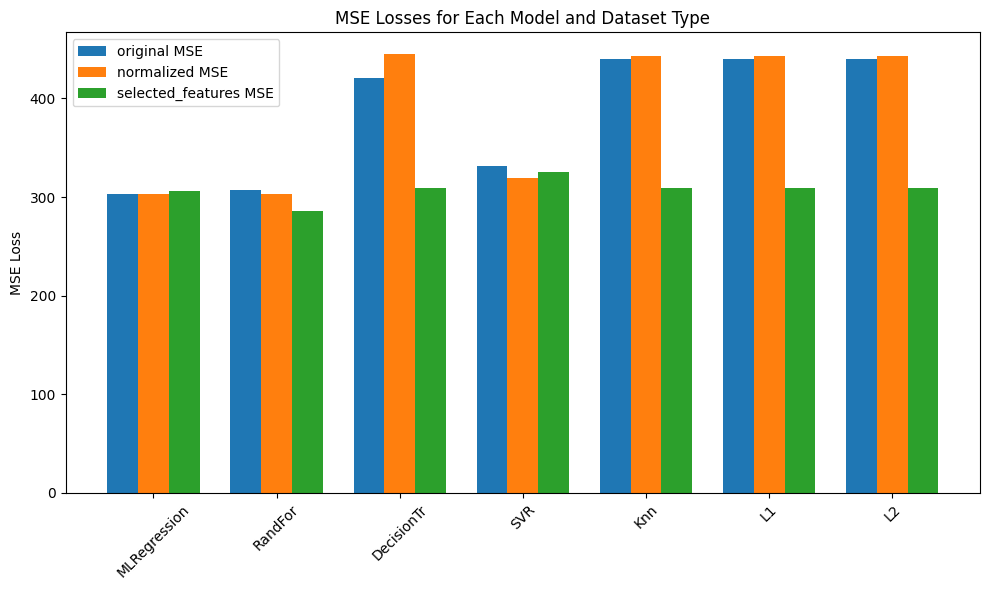

In [27]:
# Plot MSE losses
plot_losses(all_losses, loss_type="MSE")

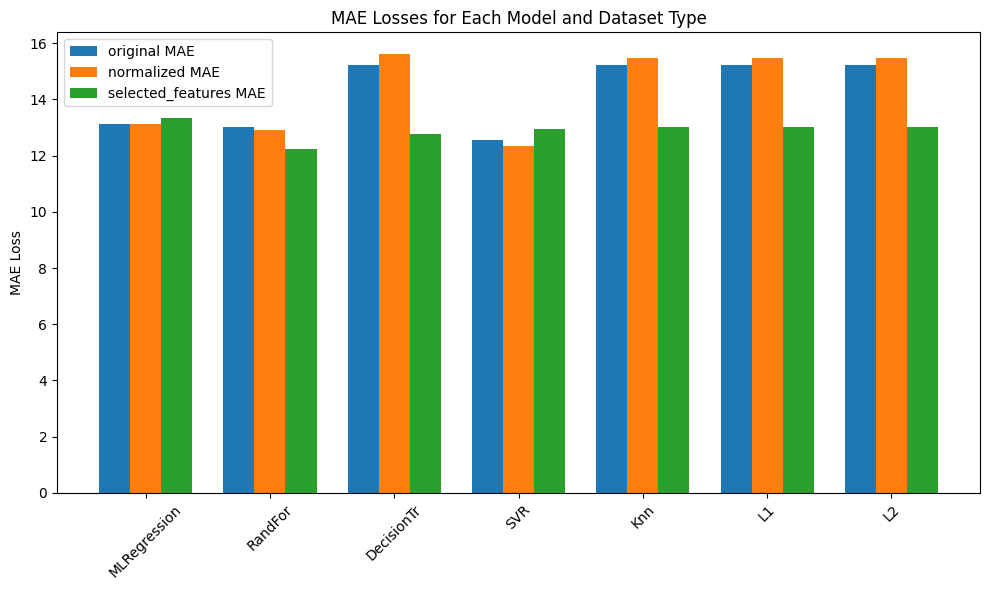

In [28]:
# Plot MAE losses
plot_losses(all_losses, loss_type="MAE")

In [29]:
all_losses

{'MLRegression': {'original': {'MSE': 303.38853474944176,
   'MAE': 13.141179693335557},
  'normalized': {'MSE': 303.3885347494418, 'MAE': 13.141179693335559},
  'selected_features': {'MSE': 306.43910031789835, 'MAE': 13.337509502574392}},
 'RandFor': {'original': {'MSE': 307.3083755390769, 'MAE': 13.025524615384615},
  'normalized': {'MSE': 302.7011751522308, 'MAE': 12.905296153846153},
  'selected_features': {'MSE': 286.1634937553376, 'MAE': 12.24237205128205}},
 'DecisionTr': {'original': {'MSE': 420.79276923076924,
   'MAE': 15.227692307692307},
  'normalized': {'MSE': 444.8028276923077, 'MAE': 15.609692307692306},
  'selected_features': {'MSE': 309.0530384615385, 'MAE': 12.773076923076923}},
 'SVR': {'original': {'MSE': 331.58466709128606, 'MAE': 12.54351159961114},
  'normalized': {'MSE': 319.56687929784727, 'MAE': 12.34425755860614},
  'selected_features': {'MSE': 325.3495037180799, 'MAE': 12.952069509565291}},
 'Knn': {'original': {'MSE': 440.27405846153846, 'MAE': 15.225076923

# Model Tuning and Cross validation

In this part, we will train the previous models using their best configuration we found thanks to model tuning, but this time we will use cross validation. However, we will only be using the original dataset.

We will use Double loop cross validation.

### Useful functions

In [30]:

def nested_cv_regression(model, param_grid, X, y, outer_splits=5, inner_splits=5, random_state=42):
    """
    Perform nested cross-validation on a regression model.
    """
    outer_cv = KFold(n_splits=outer_splits, shuffle=True, random_state=random_state)
    mae_scores = []
    mse_scores = []

    for train_ix, test_ix in outer_cv.split(X):
        # Split data for outer fold
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]

        # Inner cross-validation for hyperparameter tuning
        inner_cv = KFold(n_splits=inner_splits, shuffle=True, random_state=random_state)
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=inner_cv, n_jobs=-1)
        
        # Fit grid search on inner training data
        grid_search.fit(X_train, y_train)
        
        # Get the best model from the inner loop
        best_model = grid_search.best_estimator_
        
        # Predict on the outer test data
        y_pred = best_model.predict(X_test)
        
        # Calculate and store metrics for the outer fold
        mae_scores.append(mean_absolute_error(y_test, y_pred))
        mse_scores.append(mean_squared_error(y_test, y_pred))

    # Calculate the mean performance score across outer folds
    mean_mae = np.mean(mae_scores)
    mean_mse = np.mean(mse_scores)
    
    print(f"Mean MAE: {mean_mae}")
    print(f"Mean MSE: {mean_mse}")
    
    return {"MAE": mean_mae, "MSE": mean_mse}

In [31]:
def plot_losses_(all_losses, loss_type):
    """
    Plots the MSE or MAE losses for all models across different datasets.
    
    Parameters:
    all_losses (dict): Dictionary containing losses for each model.
    loss_type (str): "MSE" or "MAE", to select which loss to plot.
    """
    # Initialize plot data
    models = list(all_losses.keys())  # List of model names

    # Prepare the plot
    plt.figure(figsize=(10, 6))
    
    losses = []
    for model in models:
        losses.append(all_losses[model][loss_type])
    
    # Find the index of the minimum loss
    min_loss_index = np.argmin(losses)

    # Set colors for the bars
    colors = ['blue'] * len(losses)  # Default color for all bars
    colors[min_loss_index] = 'red'   # Set the color of the minimum loss bar to red

    # Plot each dataset's losses for the selected loss_type (MSE or MAE)
    x_pos = np.arange(len(models))
    plt.bar(x_pos, losses, width=0.25, label=f'{loss_type}', color=colors)
    
    # Add labels and title
    plt.xticks(x_pos + 0.25, models, rotation=45)
    plt.ylabel(f'{loss_type} Loss')
    plt.title(f'{loss_type} Losses for Each Model and Dataset Type')
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

In [32]:
X, y = read_data("../datasets/Clinical_data.xlsx")

### Decision Tree

In [33]:

model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Run nested cross-validation
decision_tree_results = nested_cv_regression(model, param_grid, X, y)


Mean MAE: 12.757695024385487
Mean MSE: 297.90241433514996


### Random Forest

In [34]:
model = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Run nested cross-validation
metrics = nested_cv_regression(model, param_grid, X, y)


Mean MAE: 12.56450294348552
Mean MSE: 285.431158297071


### SVR

In [35]:
model = SVR()
param_grid = {
    'C': [0.1, 1, 10, 100],            # Regularization parameter
    'epsilon': [0.01, 0.1, 1, 5],      # Epsilon in the epsilon-SVR model, controls the width of the no-penalty zone
    'kernel': ['linear', 'rbf']         # Kernel types for SVR
}

# Run nested cross-validation
svr_results = nested_cv_regression(model, param_grid, X, y)


Mean MAE: 12.233096940695827
Mean MSE: 291.84031924692243


### KNN

In [36]:

model = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 10, 15],     # Number of neighbors to consider
    'weights': ['uniform', 'distance'], # Weight function used in prediction
    'p': [1, 2]                         # Power parameter for the Minkowski metric (1=Manhattan, 2=Euclidean)
}

# Run nested cross-validation
knn_results = nested_cv_regression(model, param_grid, X, y)


Mean MAE: 12.868205325236474
Mean MSE: 296.17489359071044


### Lasso

In [37]:
model = Lasso(random_state=42)
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Run nested cross-validation
lasso_results = nested_cv_regression(model, param_grid, X, y)

Mean MAE: 12.680695317354852
Mean MSE: 281.36514804600154


c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.123e+04, tolerance: 1.814e+01
  model = cd_fast.enet_coordinate_descent(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.344e+04, tolerance: 1.812e+01
  model = cd_fast.enet_coordinate_descent(


### Ridge

In [38]:
model = Ridge(random_state=42)
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Run nested cross-validation
ridge_results = nested_cv_regression(model, param_grid, X, y)

Mean MAE: 12.61780581409174
Mean MSE: 278.9517982273087


In [39]:
all_losses= {
    "DecisionTree": decision_tree_results,
    "RandomForest": metrics,
    "SVR": svr_results,
    "KNN": knn_results,
    "Lasso": lasso_results,
    "Ridge": ridge_results
}

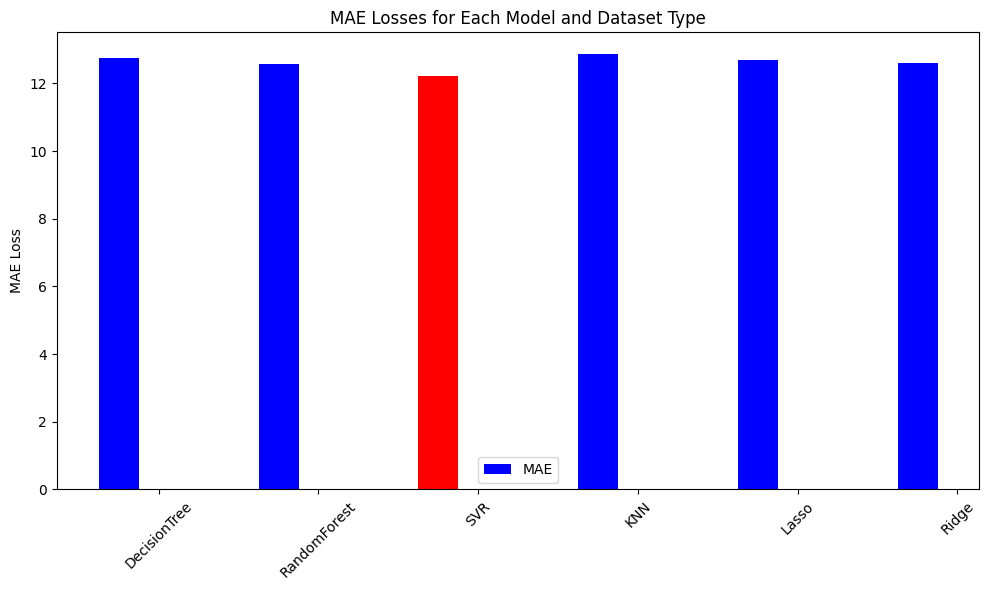

In [40]:
plot_losses_(all_losses, loss_type="MAE")

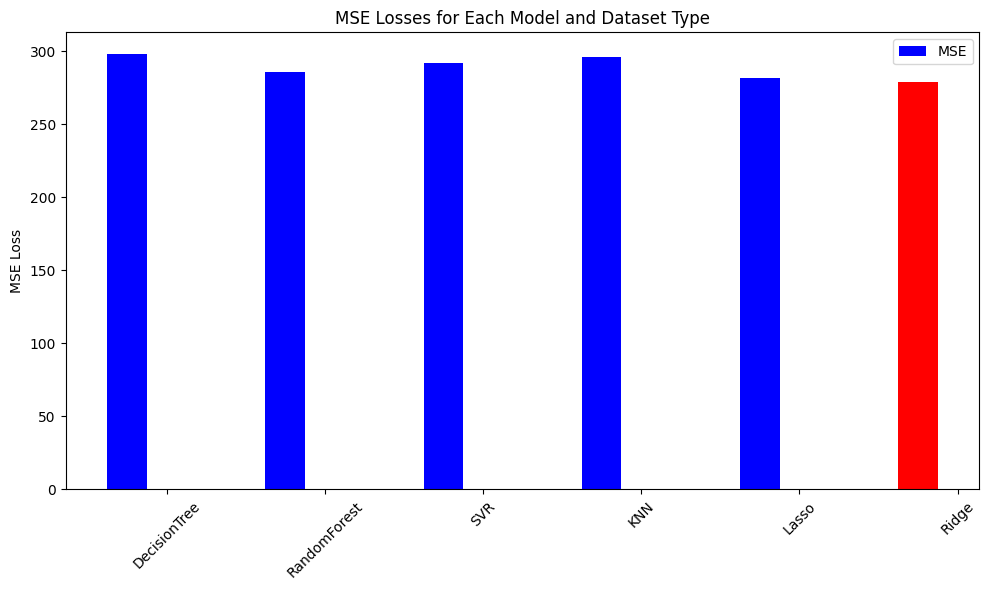

In [41]:
plot_losses_(all_losses, loss_type="MSE")

In [42]:
all_losses

{'DecisionTree': {'MAE': 12.757695024385487, 'MSE': 297.90241433514996},
 'RandomForest': {'MAE': 12.56450294348552, 'MSE': 285.431158297071},
 'SVR': {'MAE': 12.233096940695827, 'MSE': 291.84031924692243},
 'KNN': {'MAE': 12.868205325236474, 'MSE': 296.17489359071044},
 'Lasso': {'MAE': 12.680695317354852, 'MSE': 281.36514804600154},
 'Ridge': {'MAE': 12.61780581409174, 'MSE': 278.9517982273087}}